In [ ]:
pip install yfinance

In [ ]:
pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import numpy as ny
import smtplib
import yfinance as yf
from datetime import date
import datetime
import pytz
from email.mime.text import MIMEText
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
x = datetime.datetime.now()
print("Current Date and Time : ",x)
print("Curret Date, time and timestamp and Day", x.strftime('%Y/%m/%d %I:%M:%S %p:%A'))
y = datetime.datetime.now() + datetime.timedelta(minutes = 1)
yesterday = print(x.day-1)
today = print(x.day)
month = print(x.month-11)
#print(x.month)
#print(x.year)
#define the ticker symbol
tickerSymbol = ['AAPL','ROKU']
#tickerSymbol = ['CAKE','TSLA']
print(tickerSymbol)

Current Date and Time :  2021-02-27 17:28:15.227413
Curret Date, time and timestamp and Day 2021/02/27 05:28:15 PM:Saturday
26
27
-9
['AAPL', 'ROKU']


In [ ]:
position = 0
tickerData = yf.Ticker(tickerSymbol[position])
df = tickerData.history(period='3000d', start=yesterday, end=today)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-03-30,3.215039,3.230420,3.156589,3.214424,502796000,0.0,0.0
2009-03-31,3.243955,3.305482,3.230112,3.233804,570080000,0.0,0.0
2009-04-01,3.202119,3.353165,3.195966,3.343629,589372000,0.0,0.0
2009-04-02,3.388234,3.530052,3.377159,3.467295,812366800,0.0,0.0
2009-04-03,3.512825,3.572506,3.492214,3.568199,636241200,0.0,0.0
...,...,...,...,...,...,...,...
2021-02-22,128.009995,129.720001,125.599998,126.000000,103607600,0.0,0.0
2021-02-23,123.760002,126.709999,118.389999,125.860001,157859100,0.0,0.0
2021-02-24,124.940002,125.559998,122.230003,125.349998,110691500,0.0,0.0


In [ ]:
#Get the Number of Trading Days
df.shape

(3000, 7)

In [ ]:
#Visualise the close price data
plt.figure(figsize=(16,8)
plt.title('Apple Stock')
plt.xlabel('Days')
plt.ylabel('Close Prize USD($)')
plt.plot(df['Close'])
plt.show()

SyntaxError: ignored

In [ ]:
#Get the close Price
df = df[['Close']]
df.head(4)

,Close
Date,
2009-03-30,3.214424
2009-03-31,3.233804
2009-04-01,3.343629
2009-04-02,3.467295


In [ ]:
#Create Variable to Predict the 'x' days out into the future
future_days = 25
#Create a new column(target) Shifted 'x' units/days up
df['prediction']= df[['Close']].shift(-future_days)
df.tail(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,prediction
Date,,
2021-02-23,125.860001,NaN
2021-02-24,125.349998,NaN
2021-02-25,120.989998,NaN
2021-02-26,121.260002,NaN


In [ ]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows
X = np.array(df.drop(['prediction'], 1))[:-future_days]
print(X)

[[  3.21442366]
 [  3.23380423]
 [  3.34362888]
 ...
 [127.63926697]
 [131.83299255]
 [136.66577148]]


In [ ]:
#Create the target data set (y) and convert it toa numpy array and fet all of the target values except the last 'X' rows/days
y = np.array(df['prediction'])[:-future_days]
print(y)

[  4.08255482   4.07609606   3.9702704  ... 125.34999847 120.98999786
 121.26000214]


In [ ]:
#Split the data into 75% trainging and 25% Testing
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size= 0.25)

In [ ]:
#Create models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression Model
lr = LinearRegression().fit(x_train,y_train)

In [ ]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

[[127.6891861 ]
 [127.61929321]
 [128.50796509]
 [126.47101593]
 [128.03866577]
 [131.68322754]
 [130.76460266]
 [131.77308655]
 [136.48605347]
 [134.66876221]
 [133.52047729]
 [132.49201965]
 [129.21691895]
 [130.81451416]
 [126.41110229]
 [130.72465515]
 [131.85296631]
 [128.78755188]
 [128.6078186 ]
 [130.69470215]
 [128.71766663]
 [126.95029449]
 [127.63926697]
 [131.83299255]
 [136.66577148]]


In [ ]:
#Show the model tree Prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model Linear regression Prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[138.86250305 142.70675659 142.94639587 135.13000488 136.88545227
 120.98999786 133.93984985 120.98999786 133.74015808 137.18499756
 136.75999451 136.91000366 136.00999451 135.38999939 135.13000488
 129.86999512 133.19000244 112.79655457 129.71000671 129.86999512
 112.79655457 125.86000061 142.70675659 120.98999786 121.26000214]

[133.42899426 133.35579731 134.28647952 132.15323734 133.79499494
 137.61184666 136.64979548 137.70595359 142.64171734 140.73851698
 139.53594902 138.45887293 135.02894786 136.70206645 132.09049139
 136.60795952 137.78960952 134.57928326 134.39105342 136.57659055
 134.50609431 132.65517291 133.37671529 137.76869154 142.8299312 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


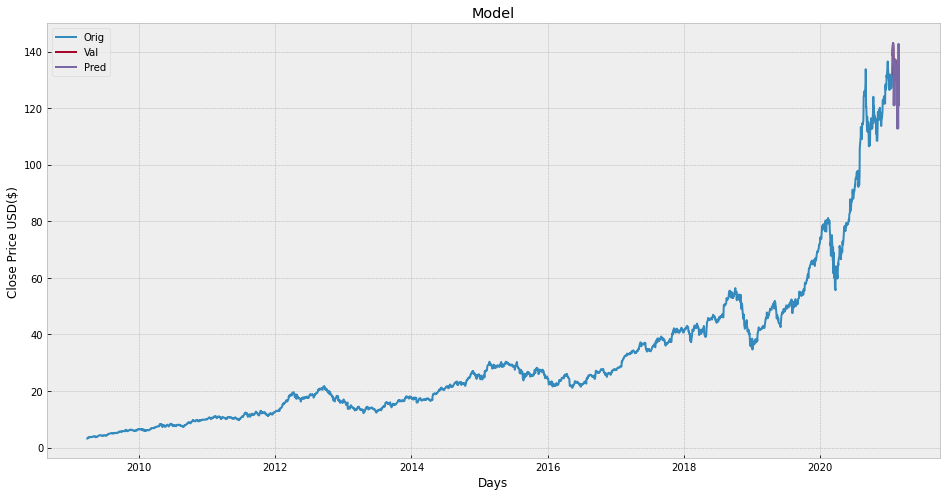

In [ ]:
#Visualize the DATA
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val', 'Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


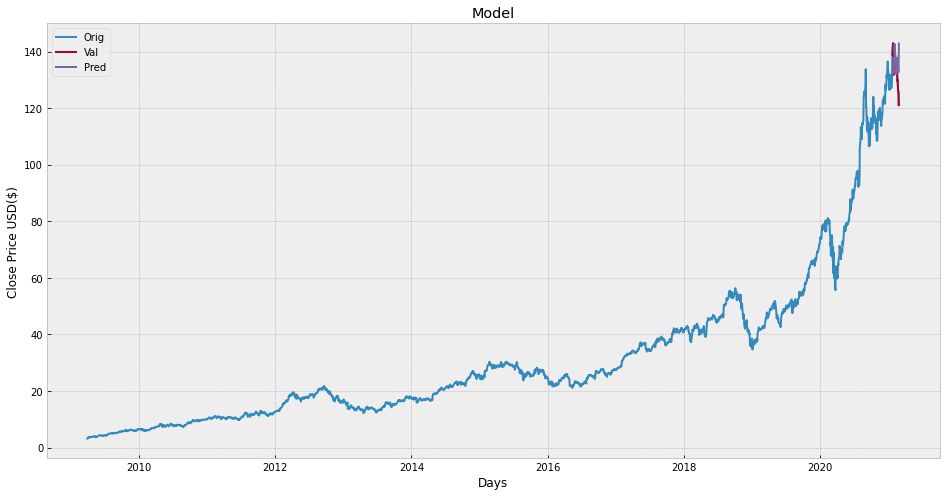

In [ ]:
#Visualize the DATA
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val', 'Pred'])
plt.show()